# Importing Libraries

In [1]:
import pandas as pd
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
df = pd.read_csv("Dataset_all.csv")
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,10.0,8.7,9.5,1.1,0.2190,0.0001
1,SplitP,10.0,8.7,9.5,1.1,0.2675,0.0023
2,SplitP,10.0,8.7,9.5,1.1,0.3566,0.0111
3,SplitP,10.0,8.7,9.5,1.1,0.2351,0.0255
4,SplitP,10.0,8.7,9.5,1.1,0.3353,0.0407
...,...,...,...,...,...,...,...
76756,Lidinoid,8.3,7.8,6.1,0.7,1267.1747,11.3756
76757,Lidinoid,8.3,7.8,6.1,0.7,1267.6182,11.3923
76758,Lidinoid,8.3,7.8,6.1,0.7,1268.4763,11.4090
76759,Lidinoid,8.3,7.8,6.1,0.7,1269.4996,11.4256


# Normalize Dataset using RIN

In [5]:
def rank_and_normalize(series):
    ranked_series = series.rank()
    normalized_series = (ranked_series - 0.5) / len(series)
    result = norm.ppf(normalized_series)
    return result

columns_to_normalize = ['X', 'Y', 'Z', 'Thickness', 'Force (N)', 'Strain (mm)']
for column in columns_to_normalize:
    df[column] = rank_and_normalize(df[column])
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,2.304713,0.806729,1.516002,0.014924,-2.549112,-3.236146
1,SplitP,2.304713,0.806729,1.516002,0.014924,-2.479119,-2.871088
2,SplitP,2.304713,0.806729,1.516002,0.014924,-2.394080,-2.715482
3,SplitP,2.304713,0.806729,1.516002,0.014924,-2.523859,-2.609514
4,SplitP,2.304713,0.806729,1.516002,0.014924,-2.414051,-2.532233
...,...,...,...,...,...,...,...
76756,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.362283,0.907819
76757,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.362572,0.911870
76758,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.363398,0.915836
76759,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.364143,0.919817


# Converting Lattice Type Variable to Numerical

In [6]:
le = preprocessing.LabelEncoder()
df['Lattice Type'] = le.fit_transform(df['Lattice Type'])
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,4,2.304713,0.806729,1.516002,0.014924,-2.549112,-3.236146
1,4,2.304713,0.806729,1.516002,0.014924,-2.479119,-2.871088
2,4,2.304713,0.806729,1.516002,0.014924,-2.394080,-2.715482
3,4,2.304713,0.806729,1.516002,0.014924,-2.523859,-2.609514
4,4,2.304713,0.806729,1.516002,0.014924,-2.414051,-2.532233
...,...,...,...,...,...,...,...
76756,2,0.208935,0.226942,-0.708049,-0.819751,1.362283,0.907819
76757,2,0.208935,0.226942,-0.708049,-0.819751,1.362572,0.911870
76758,2,0.208935,0.226942,-0.708049,-0.819751,1.363398,0.915836
76759,2,0.208935,0.226942,-0.708049,-0.819751,1.364143,0.919817


# Defining Features and Targets

In [7]:
x = df[['Lattice Type','Force (N)', 'Strain (mm)']]
y = df[['X', 'Y', 'Z', 'Thickness']]
x

,Lattice Type,Force (N),Strain (mm)
0,4,-2.549112,-3.236146
1,4,-2.479119,-2.871088
2,4,-2.394080,-2.715482
3,4,-2.523859,-2.609514
4,4,-2.414051,-2.532233
...,...,...,...
76756,2,1.362283,0.907819
76757,2,1.362572,0.911870
76758,2,1.363398,0.915836
76759,2,1.364143,0.919817


# Splitting to Train and Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

# Hyperparameters of RF using GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1,
                           n_jobs=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

## Results of GridSearchCV

In [10]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)
df_cv_results = df_cv_results[['mean_fit_time', 'mean_score_time', 'param_max_depth','param_n_estimators',
                               'mean_test_score', 'rank_test_score']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,mean_fit_time,mean_score_time,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
8,20.944231,0.548214,20,200,-0.215015,1
7,11.125645,0.263867,20,100,-0.216162,2
11,20.926123,0.575212,30,200,-0.217307,3
2,23.373005,0.631000,None,200,-0.217558,4
6,5.440292,0.172866,20,50,-0.217711,5
10,10.570907,0.256228,30,100,-0.218526,6
1,11.854207,0.279626,None,100,-0.218627,7
0,5.964260,0.163765,None,50,-0.220285,8
9,5.132163,0.134692,30,50,-0.220289,9
5,16.561577,0.304087,10,200,-0.405643,10


## Best Hyperparameters Values

In [11]:
print(grid_search.best_score_)
print(grid_search.best_params_)

-0.21501536418435543
{'max_depth': 20, 'n_estimators': 200}


## Evaluation Metrics of the Best RF Model

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MSE Test:", mse_test)
print("R2 score Test:", r2)
print("RMSE Test:", rmse_test)
print("Mean Absolute Error (MAE) Test:", mae_test)

MSE Test: 0.20147881487111616
R2 score Test: 0.7931514589697992
RMSE Test: 0.43394152444077927
Mean Absolute Error (MAE) Test: 0.23590726539669504


# Computation Time

In [15]:
fit_time = df_cv_results['mean_fit_time'].sum()
score_time = df_cv_results['mean_score_time'].sum()
mean_time = fit_time + score_time

print("Time to Compute Best Model: {:.2f} hours".format(mean_time / 3600))

Time to Compute Best Model: 0.04 hours


# Actual vs. Predicted Plots

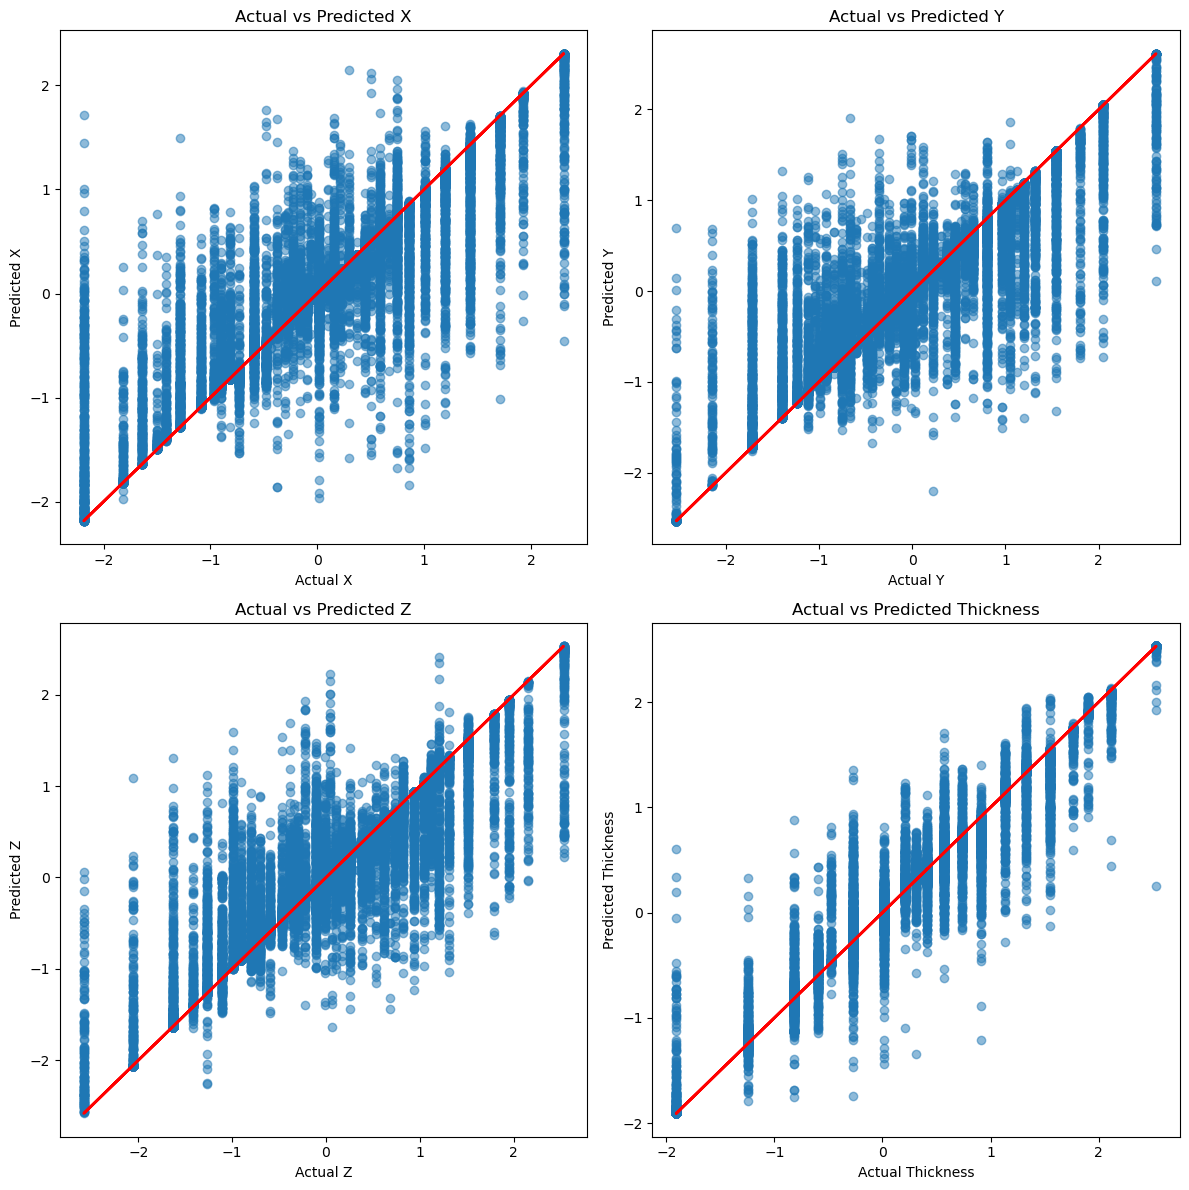

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

targets = ['X', 'Y', 'Z', 'Thickness']

for i, target in enumerate(targets):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(y_test[target], y_pred_test[:, i], alpha=0.5)
    axes[row, col].plot(y_test[target], y_test[target], color='red', linewidth=2)
    axes[row, col].set_xlabel("Actual " + target)
    axes[row, col].set_ylabel("Predicted " + target)
    axes[row, col].set_title("Actual vs Predicted " + target)

plt.tight_layout()
plt.show()

# Residual Plots

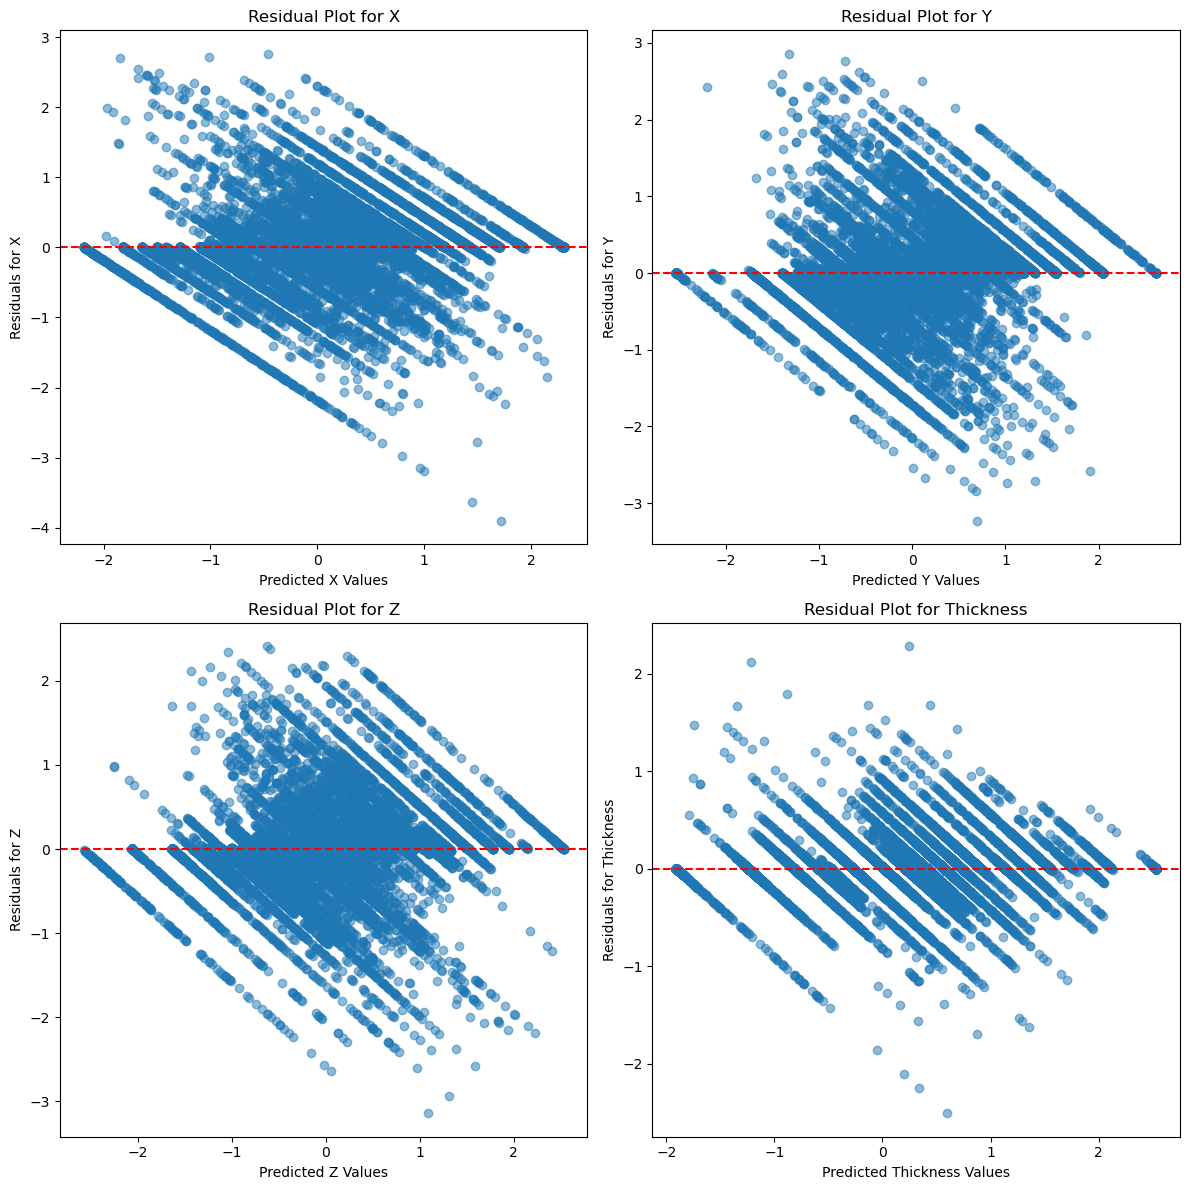

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

residuals = [y_test[target] - y_pred_test[:, idx] for idx, target in enumerate(targets)]

for idx, ax in enumerate(axes):
    ax.scatter(y_pred_test[:, idx], residuals[idx], alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted {targets[idx]} Values')
    ax.set_ylabel(f'Residuals for {targets[idx]}')
    ax.set_title(f'Residual Plot for {targets[idx]}')

plt.tight_layout()
plt.show()

# Feature Importance

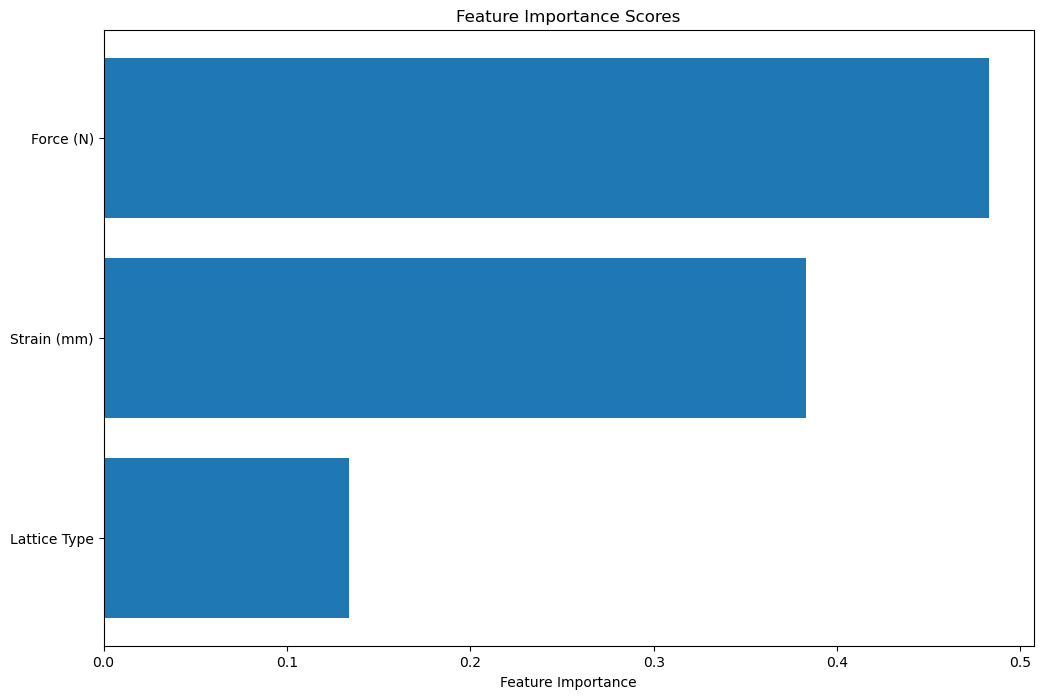

In [31]:
feature_importances = best_model.feature_importances_

plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(feature_importances)
plt.barh(x.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()